In [27]:
!ln -s ../../data ./data

ln: ./data/data: File exists


## get data

In [2]:
import pandas as pd
import pandas_ta as ta

# df = pd.read_csv('data/MSFT.csv')
df = pd.read_csv('../../data/AMZN.csv', parse_dates=True, index_col= 'Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2023-03-30,101.550003,103.040001,101.010002,102.000000,102.000000,53633400
2023-03-31,102.160004,103.489998,101.949997,103.290001,103.290001,56704300
2023-04-03,102.300003,103.290001,101.430000,102.410004,102.410004,41135700


In [3]:
df.columns = df.columns.str.lower()

In [4]:
## Take the rolling atr so the yaxis doesn't shake too much
df["atr"] = ta.atr(high=df.high, low=df.low, close=df.close)
df["atr"] = df.atr.rolling(window=30, center=True).mean()

In [5]:
df.dtypes

open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
atr          float64
dtype: object

# Plotting Price Data

In [32]:
# %matplotlib inline


In [6]:
!pip install scipy

     --------------------------------------- 44.8/44.8 MB 13.6 MB/s eta 0:00:00


In [7]:

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
from IPython import display
from IPython.display import HTML
pd.set_option('mode.chained_assignment', None)

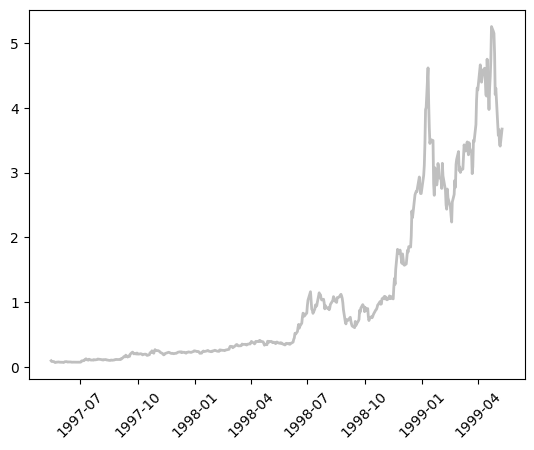

In [8]:
df2 = df.iloc[0:500]

fig, ax = plt.subplots()
plt.xticks(rotation=45)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)

# plt.show()

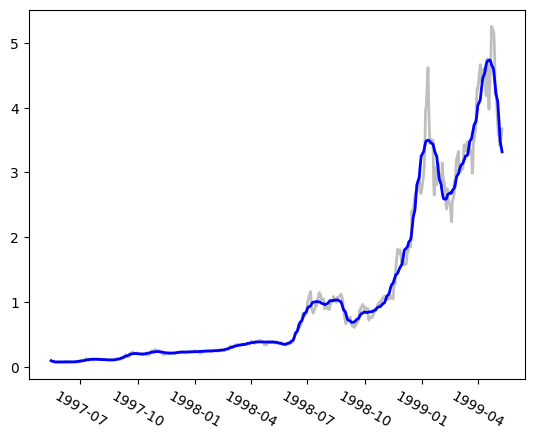

In [9]:
df2 = df.iloc[0:500]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

plt.show()

#  Detecting Extrema

[417 485]


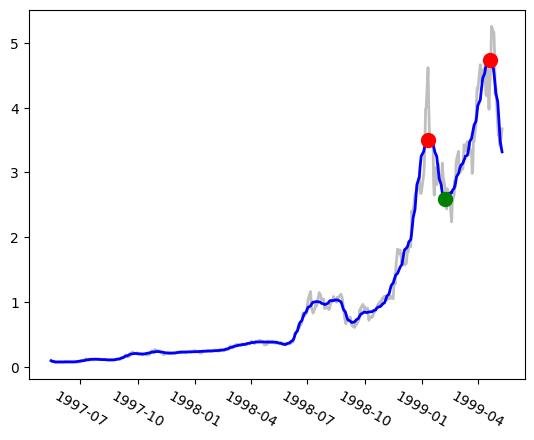

In [10]:
df2 = df.iloc[0:500]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

atr = df2.atr.iloc[-1] # all the first atrs are NaN

peaks_idx, _ = find_peaks(df2.close_smooth, distance = 15,
        width = 3, prominence=atr)

print(peaks_idx)

troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance = 15,
        width = 3, prominence=atr)

peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], \
                 c="r", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], \
                   c="g", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

plt.show()

# Finding Runs

0


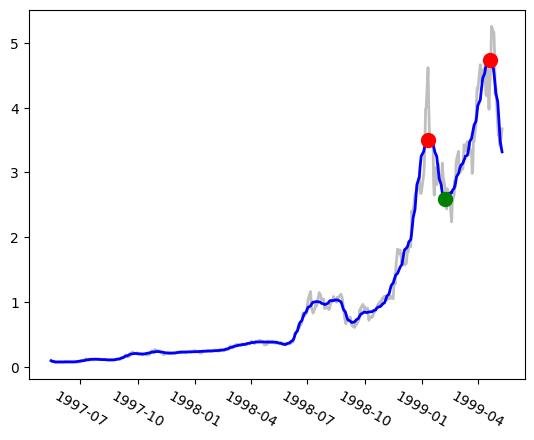

In [11]:
df2 = df.iloc[0:500]

df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

fig, ax = plt.subplots()
plt.xticks(rotation=-30)
plt.xticks(rotation=-30)
price, = ax.plot(df2.index, df2.close, c='grey', lw=2, alpha=0.5, zorder=5)
price_smooth, = ax.plot(df2.index, df2.close_smooth, c='b', lw=2, zorder=5)

atr = df2.atr.iloc[-1] # all the first atrs are NaN

peaks_idx, _ = find_peaks(df2.close_smooth, distance = 15,
        width = 3, prominence=atr)

troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance = 15,
        width = 3, prominence=atr)

peaks, = ax.plot(df2.index[peaks_idx], df2.close_smooth.iloc[peaks_idx], \
                 c="r", linestyle='None', markersize = 10.0, marker = "o", zorder=10)

troughs, = ax.plot(df2.index[troughs_idx], df2.close_smooth.iloc[troughs_idx], \
                   c="g", linestyle='None', markersize = 10.0, marker = "o", zorder=10)


up_run_length = 0
up_run = True
while up_run:
    if 2 + up_run_length > len(peaks_idx) or 2 + up_run_length > len(troughs_idx):
        break
    if df2.close_smooth.iloc[peaks_idx[-1 - up_run_length]] > df2.close_smooth.iloc[peaks_idx[-2 - up_run_length]] and \
       df2.close_smooth.iloc[troughs_idx[-1 - up_run_length]] > df2.close_smooth.iloc[troughs_idx[-2 - up_run_length]]:
        up_run_length += 1
    else:
        up_run = False


if up_run_length > 0:
    ax.set_facecolor((150/255, 255/255, 159/255, 0.3))
else:
    ax.set_facecolor("white")

print(up_run_length)

plt.show()

RuntimeError: Requested MovieWriter (ffmpeg) not available

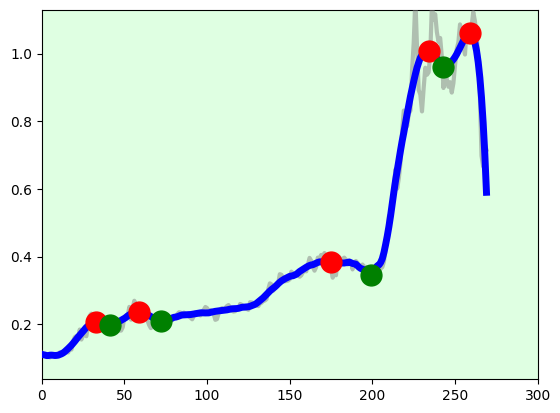

In [12]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 2**128

bars_in_frame = 300


fig, ax = plt.subplots()

# increase video quality
#fig, ax = plt.subplots(figsize=(8,8), dpi=300)

price, = ax.plot([], c='grey', lw=3, alpha=0.5, zorder=5)
price_smooth, = ax.plot([], c='b', lw=5, zorder=5)
peaks, = ax.plot([], c="r", linestyle='None', markersize = 15.0, marker = "o", zorder=10)
troughs, = ax.plot([], c="g", linestyle='None', markersize = 15.0, marker = "o", zorder=10)


## Might turn the yaxis off, can be annoying
ax.set_ylim(15000,20000)
ax.set_xlim(0,bars_in_frame)

def animate(frame):

    frames_behind = 30

    df2 = df.iloc[-len(df) + frame + 30:frame+bars_in_frame + 30]
    df2["close_smooth"] = savgol_filter(df2.close, 49, 5)

    df2 = df2.iloc[frames_behind:]

    x_coords = [x for x in range(len(df2.close_smooth))]

    price.set_data((x_coords, df2.close))
    price_smooth.set_data((x_coords, df2.close_smooth))

    first_atr = df2.atr.iloc[0]

    ax.set_ylim(df2.close_smooth.min() - 10*first_atr, df2.close_smooth.max() + 10*first_atr)

    peaks_idx, _ = find_peaks(df2.close_smooth, distance = 15,
                width = 3, prominence=first_atr)

    troughs_idx, _ = find_peaks(-1*df2.close_smooth, distance = 15,
                width = 3, prominence=first_atr)

    up_run_length = 0
    up_run = True
    while up_run:
        if 2 + up_run_length > len(peaks_idx) or 2 + up_run_length > len(troughs_idx):
            break

        if df2.close_smooth.iloc[peaks_idx[-1 - up_run_length]] >  df2.close_smooth.iloc[peaks_idx[-2 - up_run_length]] and \
           df2.close_smooth.iloc[troughs_idx[-1 - up_run_length]] >  df2.close_smooth.iloc[troughs_idx[-2 - up_run_length]]:
            up_run_length += 1
        else:
            up_run = False

    down_run_length = 0
    down_run = True
    while down_run:
        if 2 + down_run_length > len(peaks_idx) or 2 + down_run_length > len(troughs_idx):
            break

        if df2.close_smooth.iloc[peaks_idx[-1 - down_run_length]] <  df2.close_smooth.iloc[peaks_idx[-2 - down_run_length]] and \
           df2.close_smooth.iloc[troughs_idx[-1 - down_run_length]] <  + df2.close_smooth.iloc[troughs_idx[-2 - down_run_length]]:
            down_run_length += 1
        else:
            down_run = False

    peaks.set_data((peaks_idx, df2.close_smooth.iloc[peaks_idx]))
    troughs.set_data((troughs_idx, df2.close_smooth.iloc[troughs_idx]))

    if up_run_length > 0:

        ax.set_facecolor((150/255, 255/255, 159/255, 0.3))
    elif down_run_length > 0:
        ax.set_facecolor((255/255, 150/255, 150/255, 0.3))
    else:
        ax.set_facecolor("white")

    return price, price_smooth, peaks, troughs


anim = FuncAnimation(fig, animate, frames=len(df)-bars_in_frame, interval=40, blit=True)
video = HTML(anim.to_html5_video())
display.display(video)

The `RuntimeError: Requested MovieWriter (ffmpeg) not available` error occurs when you try to save an animation or video using Matplotlib, but the required `ffmpeg` package is not installed or not properly configured.

### Steps to Resolve the Issue:

1. **Install `ffmpeg`:**
   - **For Windows:**
     - Download `ffmpeg` from the [official FFmpeg website](https://ffmpeg.org/download.html).
     - Extract the downloaded file.
     - Add the path to the `bin` folder (e.g., `C:\ffmpeg\bin`) to your system's environment variables under `PATH`.
   - **For macOS:**
     - You can install `ffmpeg` using Homebrew:
       ```bash
       brew install ffmpeg
       ```
   - **For Linux:**
     - Install `ffmpeg` via your package manager:
       ```bash
       sudo apt-get install ffmpeg
       ```

2. **Verify Installation:**
   - To check if `ffmpeg` is installed correctly, open a terminal or command prompt and type:
     ```bash
     ffmpeg -version
     ```
   - This should display the installed version of `ffmpeg`.

3. **Update Matplotlib Configuration:**
   - Sometimes, even after installing `ffmpeg`, Matplotlib may not detect it automatically. To ensure it does, you can specify the `ffmpeg` path in your Matplotlib configuration:
     ```python
     import matplotlib as mpl
     mpl.rcParams['animation.ffmpeg_path'] = r'C:\ffmpeg\bin\ffmpeg.exe'  # Windows
     ```
     Replace the path with the correct path to your `ffmpeg` binary.

4. **Restart Your IDE/Terminal:**
   - After installing and configuring `ffmpeg`, restart your Python environment or terminal to ensure that the changes take effect.

5. **Test the Configuration:**
   - Try running your code again to see if the error is resolved. If `ffmpeg` is correctly installed and configured, the error should no longer appear.

This should allow you to create and save animations or videos without encountering the `ffmpeg` error.

# Saving our animation

In [6]:
with open('video-hd.html', 'w') as f:
    f.write(video.data)